# gradient boosting

in AdaBoosting we had a base easy tree model with only 2 leaves
</br>
in Gradient Boosting we can use more complex base models(main difference)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('mushrooms.csv')
print(df.shape)
df.head()
# there are 2 calesses. p --> poisonous , e --> not poisonous
# all our features are strings

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True, dtype=int)
y = df['class']

In [5]:
# Train and Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [8]:
# in default it uses desicion tree with max_depth=3

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_model = GradientBoostingClassifier() 

param_grid = {'n_estimators': [50, 100], 
              'learning_rate': [0.1, 0.05, 0.2], 
              'max_depth': [3, 4, 5]}

grid_model = GridSearchCV(gb_model, param_grid)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [10]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

error is: 0.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



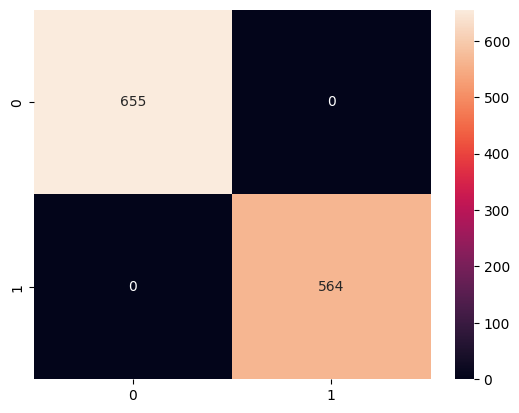

In [11]:
y_pred = grid_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

error = 1 - accuracy_score(y_test, y_pred)
print(f'error is: {error}')
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f');          

In [25]:
feats = pd.DataFrame(index=X.columns, data=grid_model.best_estimator_.feature_importances_, columns=['importance'])
imp_feats = feats[feats['importance'] > 0.0005].sort_values(by='importance')
imp_feats.head()

,importance
ring-type_p,0.000555
population_y,0.000555
stalk-surface-above-ring_s,0.000569
stalk-root_b,0.000678
stalk-color-below-ring_w,0.000822


/tmp/ipykernel_77968/1853713418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_feats, x=imp_feats.index, y='importance', palette='Set2')


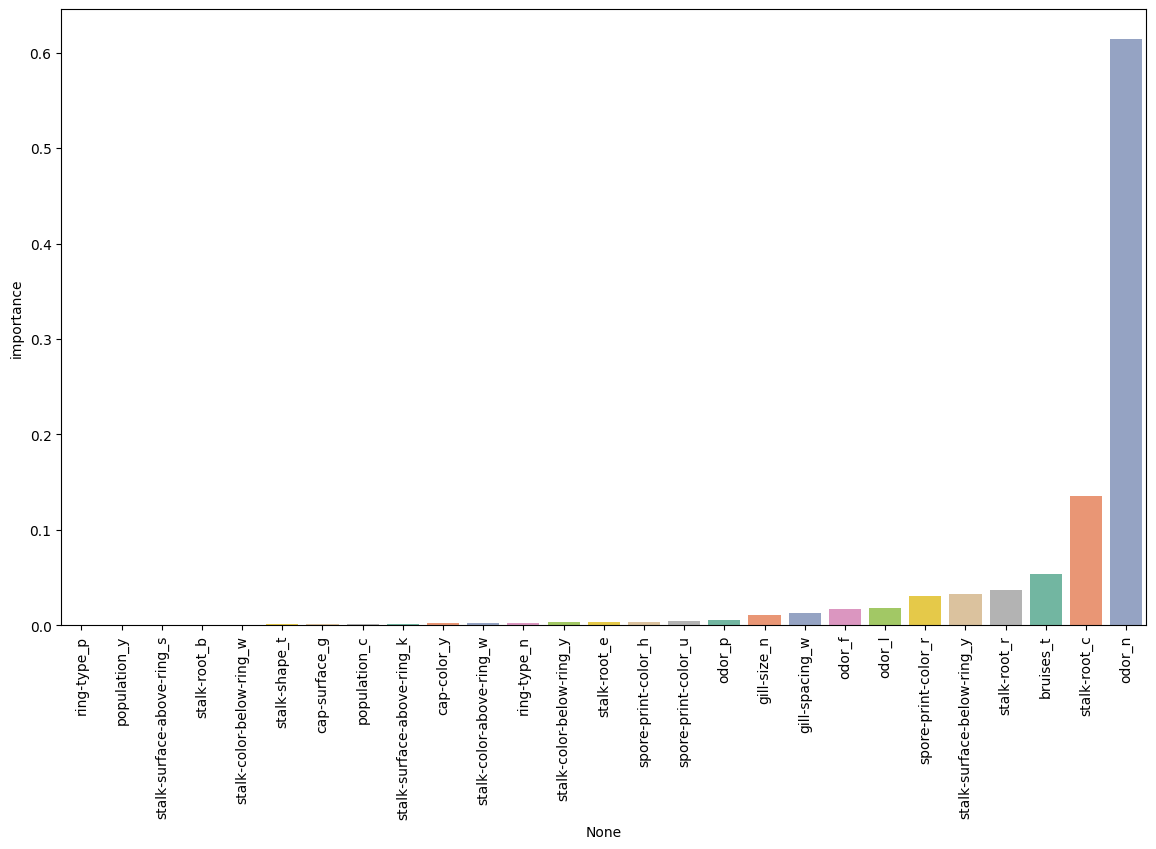

In [26]:
plt.figure(figsize=(14, 8))
sns.barplot(data=imp_feats, x=imp_feats.index, y='importance', palette='Set2')
plt.xticks(rotation=90);